# BCG Argo data
Code comes from BGC-Argo Workshop: https://github.com/Flavi1P/apart_demo

In [26]:
# Loading libraries
import argopy as ar
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Downloaded data from argo located within near the southern Icelandic shelf

In [27]:
ds = ar.DataFetcher(src="gdac").float(7902223).to_xarray()
with ar.set_options(mode='expert'):
    ds_bgc = ar.DataFetcher(backend='erddap', ds = 'bgc').float(7902223).to_xarray()
prof = ar.ArgoFloat(7902223).open_dataset('prof')

In [28]:
display(ds)
display(ds_bgc)

<xarray.Dataset> Size: 1MB
Dimensions:          (N_POINTS: 10211)
Coordinates:
    TIME             (N_POINTS) datetime64[ns] 82kB 2024-09-02T20:07:37 ... 2...
    LATITUDE         (N_POINTS) float64 82kB 62.37 62.37 62.37 ... 62.11 62.11
    LONGITUDE        (N_POINTS) float64 82kB -18.76 -18.76 ... -30.13 -30.13
  * N_POINTS         (N_POINTS) int64 82kB 0 1 2 3 4 ... 10207 10208 10209 10210
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 82kB 1 1 1 1 1 1 1 ... 48 48 48 48 48 48
    DATA_MODE        (N_POINTS) <U1 41kB 'R' 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 41kB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 82kB 7902223 7902223 ... 7902223 7902223
    POSITION_QC      (N_POINTS) int64 82kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 41kB 3.5 4.6 5.6 ... 1.125e+03 1.16e+03
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 41kB nan nan nan nan ... nan nan nan nan
    PSAL_QC          (N_POINTS) int64 82kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 41kB 11.52 11.52 11.52 ... 3.87 3.872
    TEMP_ERROR       (N_POINTS) float32 41kB nan nan nan nan ... nan nan nan nan
    TEMP_QC          (N_POINTS) int64 82kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 82kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_by:           davidlewis
    Fetched_constraints:  WMO7902223
    Fetched_date:         2025/09/19
    Fetched_from:         https://data-argo.ifremer.fr
    Fetched_uri:          https://data-argo.ifremer.fr/dac/coriolis/7902223/7...
    Processing_history:   Transformed with 'profile2point'; URI merged with '...
    raw_attrs:            {'title': 'Argo float vertical profile', 'instituti...

<xarray.Dataset> Size: 22MB
Dimensions:                            (N_POINTS: 44114)
Coordinates:
    LATITUDE                           (N_POINTS) float64 353kB ...
    LONGITUDE                          (N_POINTS) float64 353kB ...
    TIME                               (N_POINTS) datetime64[ns] 353kB ...
  * N_POINTS                           (N_POINTS) int64 353kB 0 1 ... 44113
Data variables: (12/84)
    BBP700                             (N_POINTS) float32 176kB ...
    BBP700_ADJUSTED                    (N_POINTS) float32 176kB ...
    BBP700_ADJUSTED_ERROR              (N_POINTS) float32 176kB ...
    BBP700_ADJUSTED_QC                 (N_POINTS) int64 353kB 0 0 0 3 ... 1 0 1
    BBP700_DATA_MODE                   (N_POINTS) <U1 176kB 'A' 'A' ... 'A' 'A'
    BBP700_QC                          (N_POINTS) int64 353kB 0 0 0 3 ... 1 0 1
    ...                                 ...
    TEMP_ADJUSTED                      (N_POINTS) float32 176kB ...
    TEMP_ADJUSTED_ERROR                (N_POINTS) float32 176kB ...
    TEMP_ADJUSTED_QC                   (N_POINTS) int64 353kB 8 8 8 8 ... 8 1 8
    TEMP_DATA_MODE                     (N_POINTS) <U1 176kB 'R' 'R' ... 'R' 'R'
    TEMP_QC                            (N_POINTS) int64 353kB 3 3 3 3 ... 8 1 8
    TIME_QC                            (N_POINTS) int64 353kB 1 1 1 1 ... 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           davidlewis
    Fetched_date:         2025/09/19
    Fetched_constraints:  WMO7902223
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...

## Float Trajectory

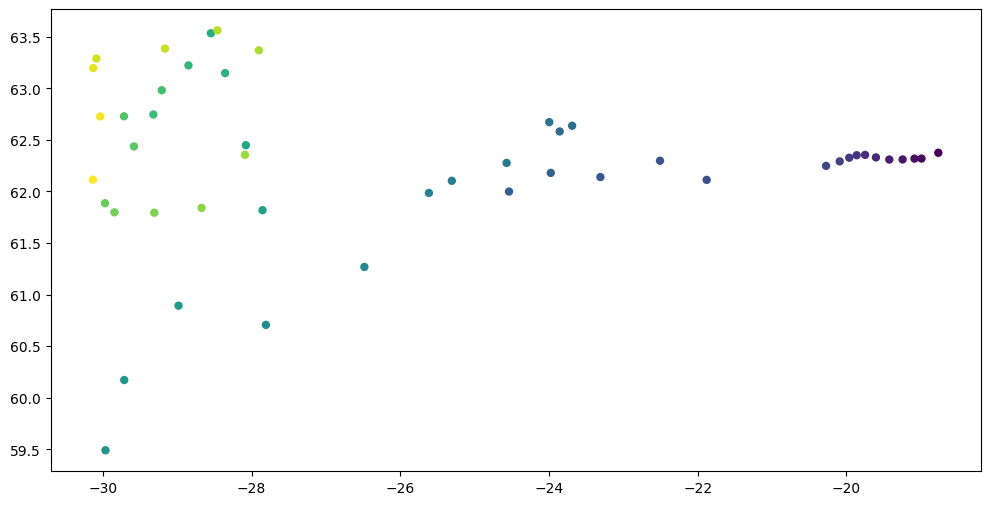

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(prof['LONGITUDE'].values, prof['LATITUDE'].values,c = prof['CYCLE_NUMBER'], s=25)
plt.show()

In [30]:
def plot_transect(ds, varname = 'CHLA_ADJUSTED', depth_min = 0, depth_max = 100, log_scale=False):
    # Build dataset from point-form arrays
    ds_points = xr.Dataset(
        {
            "VAR": ("obs", ds[varname].values),
            "PRES": ("obs", ds['PRES'].values),
            "TIME": ("obs", ds['TIME'].values)
        }
    )

    # Unique profile times
    times_unique = np.unique(ds_points['TIME'].values)

    # Regular pressure grid
    depth_grid = np.arange(depth_min, depth_max, 2)  # adjust range and step as needed

    profiles = []
    for t in times_unique:
        # Select all measurements at this time
        mask_time = ds_points['TIME'].values == t
        pres_vals = ds_points['PRES'].values[mask_time]
        var_vals = ds_points['VAR'].values[mask_time]
        
        # Drop NaNs before interpolation
        mask_valid = np.isfinite(pres_vals) & np.isfinite(var_vals)
        if mask_valid.sum() > 1:
            var_interp = np.interp(depth_grid, pres_vals[mask_valid], var_vals[mask_valid],
                                    left=np.nan, right=np.nan)
        else:
            var_interp = np.full_like(depth_grid, np.nan, dtype=float)
        profiles.append(var_interp)

    # Convert to xarray DataArray for plotting
    var_section = xr.DataArray(
        np.array(profiles),
        coords={"TIME": times_unique, "PRES": depth_grid},
        dims=("TIME", "PRES")
    )
    units = ds[varname].attrs['units']

    # Plot section
    plt.figure(figsize=(12, 6))
    if log_scale:
        pcm = plt.pcolormesh(
        var_section['TIME'],
        var_section['PRES'],
        var_section.T,
        shading='auto',
        cmap='viridis',
        norm=LogNorm(vmin=1e-3, vmax=np.nanmax(var_section))  # adjust vmin as needed
    )
    else:
        pcm = plt.pcolormesh(var_section['TIME'], var_section['PRES'], var_section.T,
                            shading='auto', cmap='viridis')
    plt.gca().invert_yaxis()
    plt.colorbar(pcm, label=f'{varname} {units}')
    plt.xlabel('Time')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'BGC-Argo {varname} Section (Depth vs Time)')
    plt.tight_layout()
    plt.show()

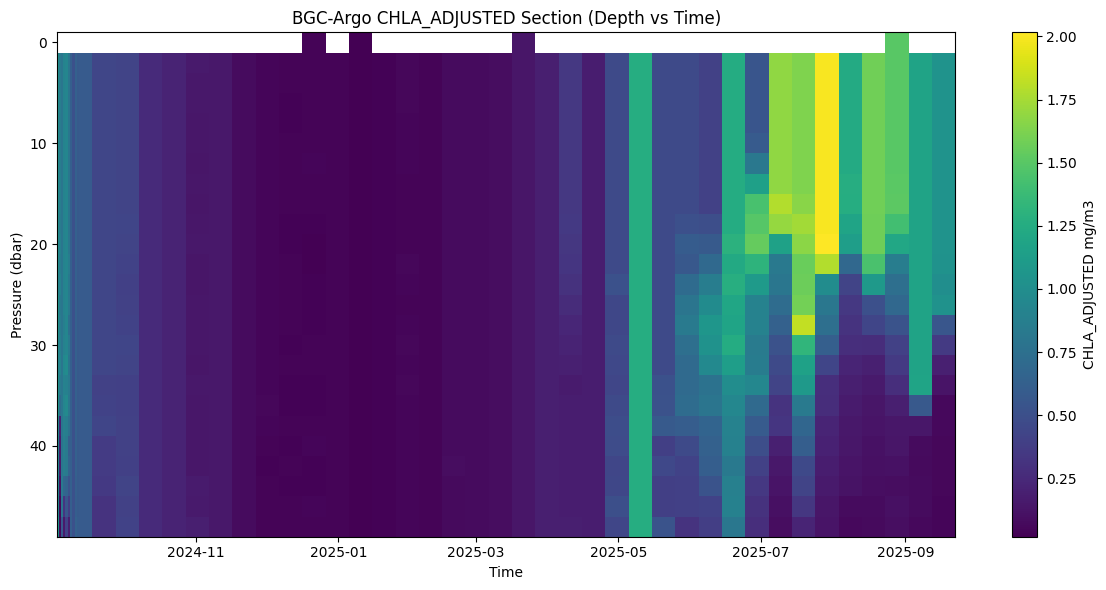

In [31]:
plot_transect(ds_bgc, 'CHLA_ADJUSTED', depth_max = 50, log_scale=False)

In [32]:

def plot_interpolated_section(ds_bgc, varname='CHLA_ADJUSTED', depth_min=0, depth_max=200, log_scale=True):
    # Build dataset from point-form arrays
    ds_points = xr.Dataset(
        {
            "VAR": ("obs", ds_bgc[varname].values),
            "PRES": ("obs", ds_bgc['PRES'].values),
            "TIME": ("obs", ds_bgc['TIME'].values)
        }
    )

    # Unique profile times
    times_unique = np.unique(ds_points['TIME'].values)

    # Regular pressure grid
    depth_grid = np.arange(depth_min, depth_max + 1, 1)  # include depth_max

    profiles = []
    for t in times_unique:
        mask_time = ds_points['TIME'].values == t
        pres_vals = ds_points['PRES'].values[mask_time]
        var_vals = ds_points['VAR'].values[mask_time]

        # Valid mask
        mask_valid = np.isfinite(pres_vals) & np.isfinite(var_vals)
        if mask_valid.sum() > 1:
            var_interp = np.interp(depth_grid, pres_vals[mask_valid], var_vals[mask_valid],
                                   left=np.nan, right=np.nan)
        else:
            var_interp = np.full_like(depth_grid, np.nan, dtype=float)
        profiles.append(var_interp)

    # Create DataArray for gridded section
    var_section = xr.DataArray(
        np.array(profiles),
        coords={"TIME": times_unique, "PRES": depth_grid},
        dims=("TIME", "PRES")
    )

    # Interpolate in time for smoothness
    time_fine = np.linspace(
        np.min(times_unique.astype("datetime64[s]").astype(float)),
        np.max(times_unique.astype("datetime64[s]").astype(float)),
        500
    ).astype("datetime64[s]")

    var_section_smooth = var_section.interp(TIME=time_fine)

    # Plotting
    plt.figure(figsize=(14, 6))

    if log_scale:
        vmin = np.nanmax([1e-6, np.nanmin(var_section_smooth.values[var_section_smooth.values > 0])])
        vmax = np.nanmax(var_section_smooth.values)
        norm = LogNorm(vmin=vmin, vmax=vmax)
        pcm = plt.pcolormesh(
            var_section_smooth['TIME'],
            var_section_smooth['PRES'],
            var_section_smooth.T,
            shading='auto',
            cmap='viridis',
            norm=norm
        )
        cbar = plt.colorbar(pcm, label=f'{varname} (log scale)')
        cbar.ax.yaxis.set_major_locator(LogLocator(base=10, subs=(1, 2, 5)))
    else:
        pcm = plt.pcolormesh(
            var_section_smooth['TIME'],
            var_section_smooth['PRES'],
            var_section_smooth.T,
            shading='auto',
            cmap='viridis'
        )
        plt.colorbar(pcm, label=varname)

    plt.gca().invert_yaxis()
    plt.xlabel('Time')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'Interpolated BGC-Argo {varname} Section (Depth vs Time)')
    plt.tight_layout()
    plt.show()


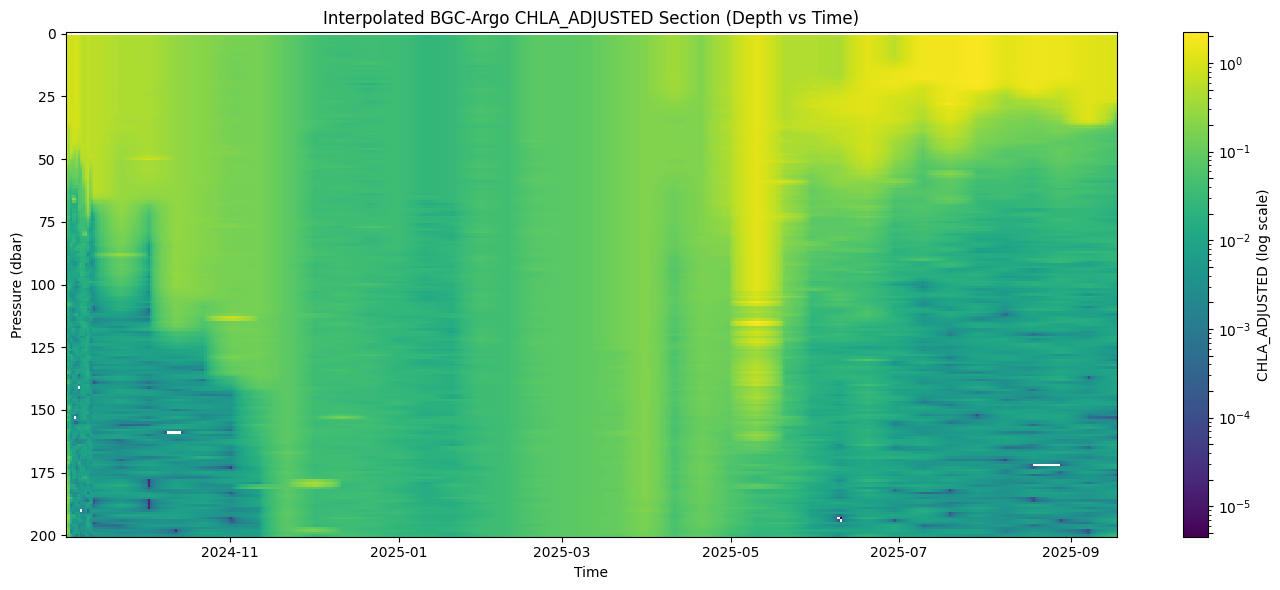

In [33]:
plot_interpolated_section(ds_bgc, 'CHLA_ADJUSTED', depth_max=200, log_scale=True)

## Depth Sepcific 

In [41]:
#Selecting Specific depths
chl_surface = ds_bgc.where(   
    (ds_bgc['PRES'] >= 0) & (ds_bgc['PRES'] <= 10))
chl_10_20 = ds_bgc.where(   
    (ds_bgc['PRES'] >= 10) & (ds_bgc['PRES'] <= 20))
chl_20_30 = ds_bgc.where(   
    (ds_bgc['PRES'] >= 20) & (ds_bgc['PRES'] <= 40))
chl_40_100 = ds_bgc.where(   
    (ds_bgc['PRES'] >= 40) & (ds_bgc['PRES'] <= 100))
chl_100_200 = ds_bgc.where(   
    (ds_bgc['PRES'] >= 100) & (ds_bgc['PRES'] <= 200))  


# Group by profile TIME and average across the points in that depth range
chl_surface = chl_surface.groupby(ds_bgc['TIME']).mean(skipna=True)
chl_10_20 = chl_10_20.groupby(ds_bgc['TIME']).mean(skipna=True)
chl_20_30 = chl_20_30.groupby(ds_bgc['TIME']).mean(skipna=True)
chl_40_100 = chl_40_100.groupby(ds_bgc['TIME']).mean(skipna=True)
chl_100_200 = chl_100_200.groupby(ds_bgc['TIME']).mean(skipna=True)   

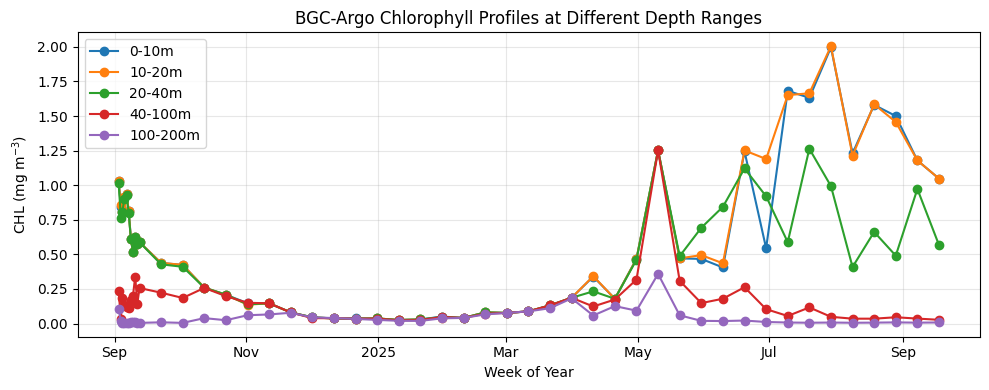

In [44]:
fig, ax = plt.subplots(figsize=(10,4))
chl_surface['CHLA_ADJUSTED'].plot(ax=ax, marker='o', label='0-10m')
chl_10_20['CHLA_ADJUSTED'].plot(ax=ax, marker='o', label='10-20m') 
chl_20_30['CHLA_ADJUSTED'].plot(ax=ax, marker='o', label='20-40m')
chl_40_100['CHLA_ADJUSTED'].plot(ax=ax, marker='o', label='40-100m')
chl_100_200['CHLA_ADJUSTED'].plot(ax=ax, marker='o', label='100-200m')


ax.set_title('BGC-Argo Chlorophyll Profiles at Different Depth Ranges')
ax.set_xlabel('Week of Year')
ax.set_ylabel('CHL (mg m$^{-3}$)')


ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


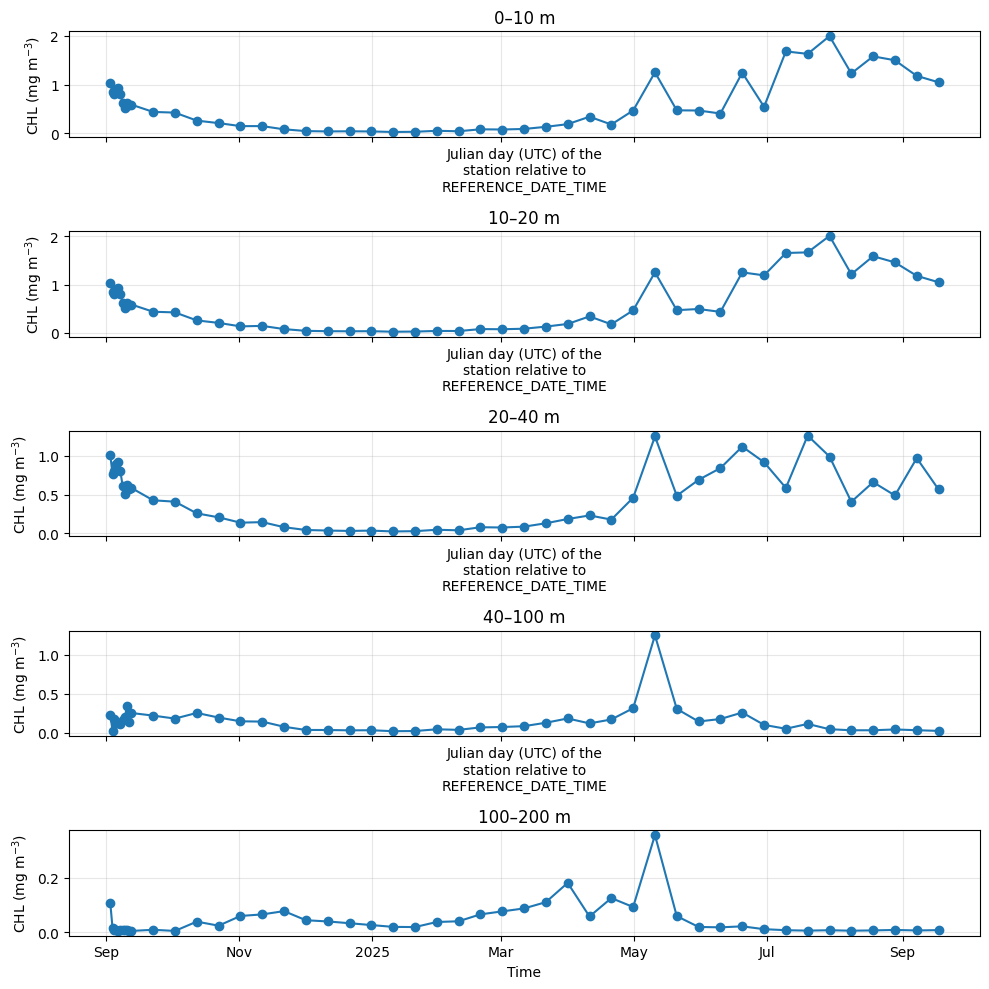

In [43]:
depth_series = {
    "0–10 m": chl_surface['CHLA_ADJUSTED'],
    "10–20 m": chl_10_20['CHLA_ADJUSTED'],
    "20–40 m": chl_20_30['CHLA_ADJUSTED'],
    "40–100 m": chl_40_100['CHLA_ADJUSTED'],
    "100–200 m": chl_100_200['CHLA_ADJUSTED'],
}

fig, axes = plt.subplots(len(depth_series), 1, figsize=(10, 10), sharex=True)

for ax, (label, series) in zip(axes, depth_series.items()):
    series.plot(ax=ax, marker='o')
    ax.set_title(label)
    ax.set_ylabel("CHL (mg m$^{-3}$)")
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Time")
plt.tight_layout()
plt.show()

In [ ]:
chl_surface

<xarray.Dataset> Size: 24MB
Dimensions:                            (N_POINTS: 44114)
Coordinates:
    LATITUDE                           (N_POINTS) float64 353kB 62.37 ... 62.11
    LONGITUDE                          (N_POINTS) float64 353kB -18.76 ... -3...
    TIME                               (N_POINTS) datetime64[ns] 353kB 2024-0...
  * N_POINTS                           (N_POINTS) int64 353kB 0 1 ... 44113
Data variables: (12/84)
    BBP700                             (N_POINTS) float32 176kB nan nan ... nan
    BBP700_ADJUSTED                    (N_POINTS) float32 176kB nan nan ... nan
    BBP700_ADJUSTED_ERROR              (N_POINTS) float32 176kB nan nan ... nan
    BBP700_ADJUSTED_QC                 (N_POINTS) float64 353kB nan 0.0 ... nan
    BBP700_DATA_MODE                   (N_POINTS) object 353kB nan 'A' ... nan
    BBP700_QC                          (N_POINTS) float64 353kB nan 0.0 ... nan
    ...                                 ...
    TEMP_ADJUSTED                      (N_POINTS) float32 176kB nan ... nan
    TEMP_ADJUSTED_ERROR                (N_POINTS) float32 176kB nan nan ... nan
    TEMP_ADJUSTED_QC                   (N_POINTS) float64 353kB nan 8.0 ... nan
    TEMP_DATA_MODE                     (N_POINTS) object 353kB nan 'R' ... nan
    TEMP_QC                            (N_POINTS) float64 353kB nan 3.0 ... nan
    TIME_QC                            (N_POINTS) float64 353kB nan 1.0 ... nan
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           davidlewis
    Fetched_date:         2025/09/19
    Fetched_constraints:  WMO7902223
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...

In [37]:
chl_surface

<xarray.Dataset> Size: 20kB
Dimensions:                            (TIME: 48)
Coordinates:
  * TIME                               (TIME) datetime64[ns] 384B 2024-09-02T...
Data variables: (12/70)
    BBP700                             (TIME) float32 192B 0.002706 ... 0.00233
    BBP700_ADJUSTED                    (TIME) float32 192B 0.002706 ... 0.00233
    BBP700_ADJUSTED_ERROR              (TIME) float32 192B nan nan ... nan nan
    BBP700_ADJUSTED_QC                 (TIME) float64 384B 2.029 2.204 ... 1.378
    BBP700_QC                          (TIME) float64 384B 2.029 2.204 ... 1.378
    CDOM                               (TIME) float32 192B 2.771 2.821 ... 2.83
    ...                                 ...
    TEMP                               (TIME) float32 192B 11.52 11.48 ... 10.6
    TEMP_ADJUSTED                      (TIME) float32 192B 11.51 11.48 ... 10.6
    TEMP_ADJUSTED_ERROR                (TIME) float32 192B nan nan ... nan nan
    TEMP_ADJUSTED_QC                   (TIME) float64 384B 7.382 7.429 ... 7.067
    TEMP_QC                            (TIME) float64 384B 5.971 6.337 ... 6.3
    TIME_QC                            (TIME) float64 384B 1.0 1.0 ... 1.0 1.0
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           davidlewis
    Fetched_date:         2025/09/19
    Fetched_constraints:  WMO7902223
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...